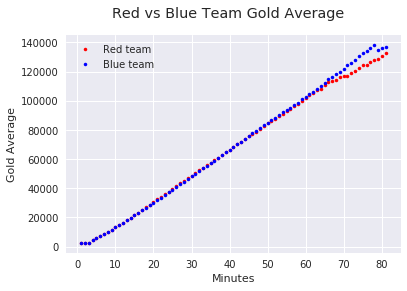

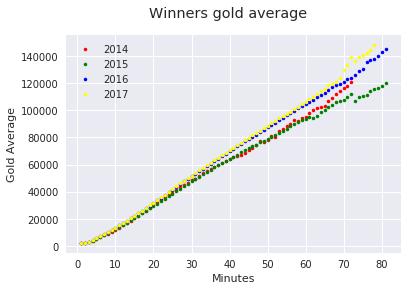

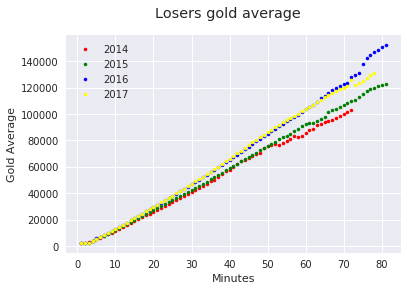

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

sns.set()

#Funtions
def plotEcdf(data,xlabel='',ylabel='', marker='.',linestyle='none',color='blue'):
    
    x,y = ecdf(data)
    _=plt.plot(x,y,marker=marker,linestyle=linestyle,color=color)
    _=plt.xlabel(xlabel)
    _=plt.ylabel(ylabel)
    
    return _

def normalPlot(x,y,xlabel,ylabel, marker='.',linestyle='none',color='blue'):
    
    _=plt.plot(x,y,marker=marker,linestyle=linestyle,color=color)
    _=plt.xlabel(xlabel)
    _=plt.ylabel(ylabel)
    
    return _

def swarmPlot(x,y,df):
    plt.clf()
    _=sns.swarmplot(x = x, y =y, data=df)
    
    return _
    
def ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x,y

def goldAnalysis(gold):
    
    types = ['goldblue','goldred']
    goldTypes = (gold[gold['Type']==t] for t in types)
    goldBlue = next(goldTypes) 
    goldBlue.reset_index(inplace=True,drop=True)
    goldBlue = goldBlue.mean(axis=0)

    goldRed = next(goldTypes)
    goldRed.reset_index(inplace=True,drop=True)
    goldRed = goldRed.mean(axis=0)
    
    fig = plt.figure()
    fig.suptitle('Red vs Blue Team Gold Average')
    _= normalPlot(np.arange(1,82),goldBlue,'Minutes','Gold Average',marker='.', color='red')
    _= normalPlot(np.arange(1,82),goldRed,'Minutes','Gold Average',marker='.', color='blue')
    _= plt.legend(['Red team','Blue team'])
    plt.show()

def matchesAnalysis(matches):    
    
    def unwrap(data):
        
        data = next(data)
        data.columns = ['gold']
        data = [eval(gold) for gold in data['gold']]
        data = pd.DataFrame(data)
        
        return data
    
    def plotWinners(data):
            
        years = [2014,2015,2016,2017]
        m_per_year = (data[data['Year']==x] for x in years)

        winnerPerYear = (pd.DataFrame(np.where(x['bResult']==1,x['goldblue'],x['goldred'])) for x in m_per_year)

        fig = plt.figure()
        fig.suptitle('Winners gold average')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='red')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='green')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='blue')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='yellow')
        plt.legend(['2014','2015','2016','2017'])
        plt.show()
        
    def plotLosers(data):
            
        years = [2014,2015,2016,2017]
        m_per_year = (data[data['Year']==x] for x in years)

        winnerPerYear = (pd.DataFrame(np.where(x['bResult']==0,x['goldblue'],x['goldred'])) for x in m_per_year)

        fig = plt.figure()
        fig.suptitle('Losers gold average')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='red')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='green')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='blue')
        winnerGold = unwrap(winnerPerYear)
        winnerGold = winnerGold.mean(axis=0)
        _= normalPlot(np.arange(1,len(winnerGold)+1),winnerGold,'Minutes','Gold Average',marker='.', color='yellow')
        plt.legend(['2014','2015','2016','2017'])
        plt.show()

    plotWinners(matches)
    plotLosers(matches)
    
    

matches = pd.read_csv("matches.csv.zip", compression='zip').drop('Address',axis=1)
gold = pd.read_csv("gold.csv.zip", compression='zip').drop('Address',axis=1)

goldAnalysis(gold)
matchesAnalysis(matches)
